### Grid usage examples

This jupyter notebook quickly goes through the basic usage of the grid classes.
There is an integer grid that basically represents combinations of integers and knows which formal coordinate it
corresponds to. Then, there is a float-grid that knows how to translate the integer points to floats


In [ ]:
from qutree import *
import numpy as np

# create a 1D grid
grid1d = Grid(range(10), 1)
print("1D grid:\n", grid1d)

# manually create two 2D grids
grid1 = Grid(np.array([[0, 1], [1, 2], [2, 3]]), [2, 1])
grid2 = Grid(np.array([[4, 5], [5, 6], [6, 7]]), [3, 0])

print("2D grid 1:\n", grid1)
print("2D grid 2:\n", grid2)

1D grid:
 coords: [1]
grid:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
2D grid 1:
 coords: [2 1]
grid:
[[0 1]
 [1 2]
 [2 3]]
2D grid 2:
 coords: [3 0]
grid:
[[4 5]
 [5 6]
 [6 7]]


In [ ]:
# Cartesian product of the two 2D grids:
# combine the two 2D grids into a 4D grid
grid12 = grid1 @ grid2
print("4D grid:\n", grid12)

# the coordinates are permuted, let's resort them
grid12 = grid12.permute()
print(grid12)

# ... and back again
grid12 = grid12.permute()
print(grid12)

4D grid:
 coords: [2 1 3 0]
grid:
[[0 1 4 5]
 [0 1 5 6]
 [0 1 6 7]
 [1 2 4 5]
 [1 2 5 6]
 [1 2 6 7]
 [2 3 4 5]
 [2 3 5 6]
 [2 3 6 7]]
coords: [0 1 2 3]
grid:
[[5 1 0 4]
 [6 1 0 5]
 [7 1 0 6]
 [5 2 1 4]
 [6 2 1 5]
 [7 2 1 6]
 [5 3 2 4]
 [6 3 2 5]
 [7 3 2 6]]
coords: [2 1 3 0]
grid:
[[0 1 4 5]
 [0 1 5 6]
 [0 1 6 7]
 [1 2 4 5]
 [1 2 5 6]
 [1 2 6 7]
 [2 3 4 5]
 [2 3 5 6]
 [2 3 6 7]]


In [ ]:
# now a more complex combination of multple grids
grid1 = Grid(np.array([[0, 1], [1, 2], [2, 3]]), [2, 1])
grid2 = Grid(np.array([[4, 5], [5, 6], [6, 7]]), [3, 0])
grid3 = Grid(np.array([[8, 9], [9, 10], [10, 11]]), [4, 5])
grids = [grid1, grid2, grid3]

# combine the three 2D grids into a 6D grid
grid123 = cartesian_product(grids)
print(grid123.grid.shape)

# those are too many grid points.. let's get a random selection of 10 high dimensional points
print(grid123.random_subset(10))

(27, 6)
coords: [2 1 3 0 4 5]
grid:
[[ 2  3  6  7  8  9]
 [ 1  2  4  5  8  9]
 [ 1  2  6  7 10 11]
 [ 1  2  5  6  8  9]
 [ 2  3  6  7 10 11]
 [ 0  1  4  5  8  9]
 [ 2  3  5  6 10 11]
 [ 0  1  5  6 10 11]
 [ 2  3  4  5  9 10]
 [ 1  2  5  6 10 11]]


In [ ]:
# Now to floatgrids!
# something like [0.1, 0.2, ...]

# just needs a generator and a coordinate
fgrid1 = Grid(np.linspace(0., 1., 10), 0)
fgrid2 = Grid(np.linspace(-1., 1, 15), 1)

# combine
subgrid = (fgrid1 @ fgrid2).random_subset(10)
print(subgrid)

# How can we evaluate a function on this grid?
def fun(x):
    """
    Function that evaluates grid point.
    E.g. objective function in optimization.
    """
    return np.sum(x**2)

print(subgrid.evaluate(fun))

coords: [0 1]
grid:
[[ 0.66666667  0.        ]
 [ 1.          0.        ]
 [ 0.         -0.57142857]
 [ 0.33333333 -0.57142857]
 [ 0.33333333  0.        ]
 [ 0.33333333 -0.14285714]
 [ 0.88888889 -0.28571429]
 [ 0.66666667 -0.28571429]
 [ 0.44444444 -0.42857143]
 [ 0.44444444  0.42857143]]
[0.44444444 1.         0.32653061 0.43764172 0.11111111 0.13151927
 0.87175611 0.5260771  0.38120433 0.38120433]


In [ ]:
def fun(x):
    return np.sum(x**2)

grid1 = Grid(np.linspace(0., 1., 5), 0)
grid2 = Grid(np.linspace(0., 1., 5), 1)
grid12 = grid1 @ grid2
grid12 = grid12.random_subset(10)
f_grid = grid12.evaluate(fun)
print(f_grid)

[0.25   1.     0.8125 0.5    1.0625 0.5625 1.25   1.5625 0.625  0.    ]


In [ ]:
N = 10 # primitive grid size
r = 2
grids = [Grid(np.linspace(0., 1., N), i) for i in range(3)]
xy = (grids[0] @ grids[1]).random_subset(10)
z = grids[2]
print((xy @ z).random_subset(10))

coords: [0 1 2]
grid:
[[0.77777778 0.88888889 0.77777778]
 [0.22222222 0.33333333 0.55555556]
 [0.77777778 0.88888889 0.        ]
 [0.66666667 0.44444444 0.22222222]
 [0.44444444 1.         0.77777778]
 [0.66666667 0.44444444 0.88888889]
 [1.         0.44444444 0.33333333]
 [1.         0.44444444 0.22222222]
 [0.22222222 0.44444444 0.44444444]
 [0.77777778 0.88888889 0.66666667]]


/var/folders/01/c_1q1nmd6xj9htpk8cfsr_vc0000gn/T/ipykernel_33731/378480049.py:7: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="twopi")


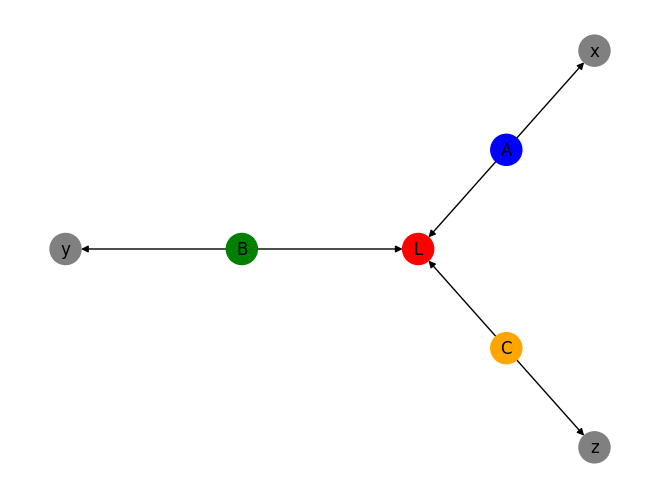

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

G = nx.DiGraph()
G.add_edges_from([(1, 11), (2, 12), (3, 13), (1, 0), (2, 0), (3, 0)])
pos = graphviz_layout(G, prog="twopi")
labels = {11: "x", 12: "y", 13: "z", 0: "L", 1: "A", 2: "B", 3: "C"}
node_colors = {11: 'grey', 12: 'grey', 13: 'grey', 0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}
nx.draw(G, pos = pos,
        with_labels=True, labels = labels,
        node_color = [node_colors[n] for n in G.nodes],
        node_size = 500,
        )
plt.draw() 

In [ ]:
# Let's make a tree that corresponds to a simple 3D tree {{{x}, {y}}, {z}}
N = 15 # primitive grid size
r = 3
grids = [Grid(np.linspace(0., 1., N), i) for i in range(3)]
x, y, z, = 0, 1, 2

# build incomplete edge-grids
# up-sweep
a_up = grids[x].random_subset(r)
b_up = grids[y].random_subset(r)
c_up = (a_up @ b_up).random_subset(r)

# down-sweep
c_down = grids[z].random_subset(r)
a_down = (c_down @ b_up).random_subset(r)
b_down = (c_down @ a_up).random_subset(r)

# build complete node-grids
A = (grids[0] @ a_down).permute()
B = (grids[1] @ b_down).permute()
C = (grids[2] @ c_up).permute()
L = (a_up @ b_up @ c_down).permute()

# combine them into a single grid
xyz = L + A + B + C 
f = xyz.evaluate(fun)

from qutree.plot import plot_xyz
plot_xyz(xyz, f)

In [ ]:

fL = L.evaluate(fun)
fA = A.evaluate(fun)
fB = B.evaluate(fun)
fC = C.evaluate(fun)
fL = ["red"] * len(fL)
fA = ["blue"] * len(fA)
fB = ["green"] * len(fB)
fC = ["orange"] * len(fC)
xyz = A + B + C + L
f = np.concatenate([fA, fB, fC, fL])

from qutree.plot import *
plot_xyz(xyz, f)


In [ ]:
# we can also slice our grid
# [points, dimensions]
grid = A
print(A[:5, 0:2])

coords: [0 1]
grid:
[[0.         0.78571429]
 [0.         0.5       ]
 [0.         0.07142857]
 [0.07142857 0.78571429]
 [0.07142857 0.5       ]]


In [ ]:
gs = [a_up, b_up, c_down]
new_c_up = maxvol_grids(gs, fun)

A = (grids[0] @ a_down).permute()
B = (grids[1] @ b_down).permute()
C = (grids[2] @ new_c_up).permute()
L = (a_up @ b_up @ c_down).permute()

# combine them into a single grid
xyz = L + A + B + C 
f = xyz.evaluate(fun)
from qutree.plot import plot_xyz
plot_xyz(xyz, f)

In [ ]:
print([[*range(10)]] * 2)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]


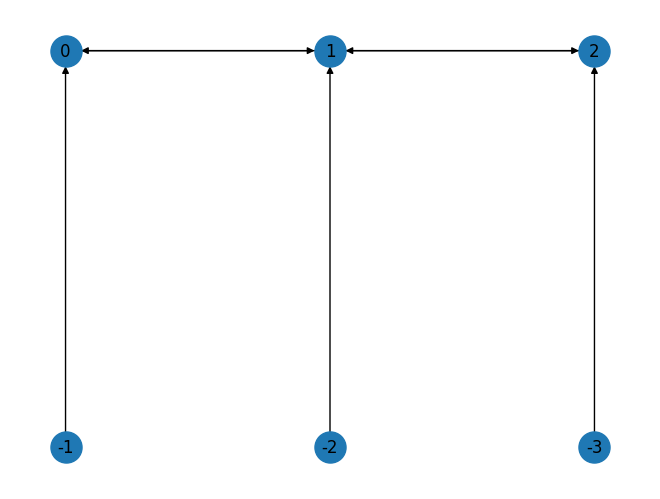

In [ ]:
f = 3
N = 20

tn = tt_graph(f, r = 4, N = N)
T = tn_grid(tn, [np.linspace(0, 1, N)] * f)

plot_tn_xyz(tn, fun)
plot_tt_diagram(tn)

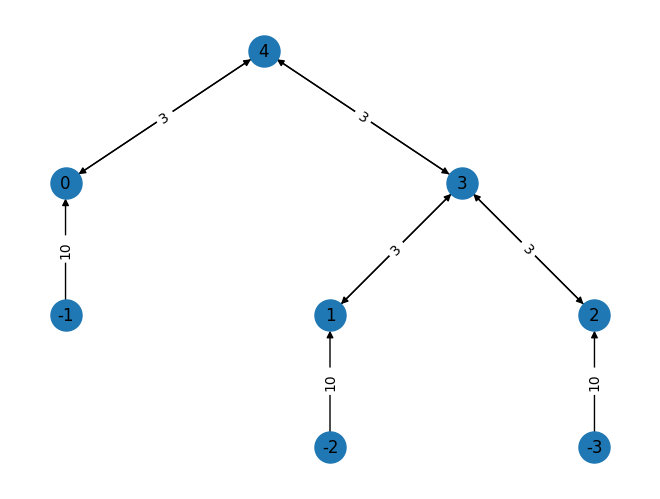

In [ ]:
f = 3
N = 10
r = 3

G = balanced_tree(f, r, N)
G = tn_grid(G, [linspace(0., 1., N)] * f)
plot_tn_xyz(G, fun)
plot_tree(G)
